In [91]:
import numpy as np
import math
import random

Załadujemy zbiór danych - obrazków cyfr z pakietu sklearn:

In [141]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
(1797, 64)


(1797, 64)


(1797, 64)

Wyświetlenie pierwszego z obrazków w kolekcji (indeks 0). Możesz spróbować wyświetlić kilka kolejnych.

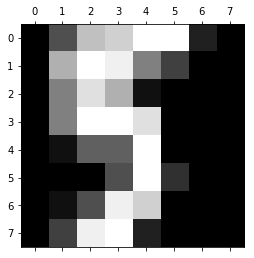

In [143]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[15]) 
plt.show() 

Tak powinien wyglądać label (etykieta) tego obrazka:

In [144]:
digits.target[11]

1

Sprawdzenie wielkosci zbioru danych:

In [145]:
print(digits['target'].shape)

(1797,)


In [146]:
print(digits['images'].shape)

(1797, 8, 8)


Praca z obrazkami wymaga spłaszczenia ich do 1-wymiarowego wektora. Podpowiedź: użyj komendy numpy.reshape!

In [147]:
X = digits['images'].reshape(8*8, 1797)


In [148]:
Y = digits['target']
print(Y)

[0 1 2 ... 8 9 8]


In [149]:
X.shape

(64, 1797)

In [150]:
Y.shape

(1797,)

In [151]:
np.unique(Y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Regresja logistyczna pozwala na binarną klasyfikację (tylko dwie klasy), spróbujmy więc nauczyć nasz model rozpoznawania zer i jedynek. Wyciągnijmy więc tylko te dwa zbiory liczb w podziale na X i Y:

In [152]:
ix = np.isin(Y, [0,1])
#ix = np.in1d(Y, [0,1])
X_zeroone = np.compress(ix, X, axis=1)
Y_zeroone = np.compress(ix, Y, axis=0)
print(ix)

[ True  True False ... False False False]


Na tym etapie, X_zeroone i Y_zeroone zawierają wyłącznie obrazki oraz etykiety dla zer i jedynek.

In [153]:
X_zeroone.shape

(64, 360)

In [154]:
np.unique(Y_zeroone)

array([0, 1])

#### Zadanie
Podziel X_zeroone i Y_zeroone na zbiory treningowe _train oraz testowe _test. Niech pierwsze 300 przypadków należy do zbioru treningowego:

In [173]:
takefirst=300
X_train, X_test = X_zeroone[:,:takefirst], X_zeroone[:,takefirst:]
Y_train, Y_test = Y_zeroone[:takefirst], Y_zeroone[takefirst:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(64, 300)
(64, 60)
(300,)
(60,)


#### Zadanie
Użyj funkcji np_sigmoid z arkusza zadań z numpym

In [280]:
def np_sigmoid(z):
    # poczatek implementacji
    s = 1 / (1 + np.exp(-z))
    # koniec implementacji
    print("s" + str(s.shape))
    return s


In [281]:
def inicjalizuj_zerami(dim):
    w = np.zeros((dim,1))
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    type(w)
    return w, b    

type(w)

numpy.ndarray

Zaimplementuj metodę propaguj, a w niej:
<img src="images/wzory_regresja_logistyczna.png">
W tym przypadku * oznacza iloczyn macierzowy, .T transpozycję macierzy.
Przy obliczaniu aktywacji czyli A, funkcją zewnętrzną jest sigmoid.

In [299]:
def propaguj(w, b, X, Y):
    m = X.shape[1]
    # propagacja w przod, z X liczymy koszt:
    # poczatek implementacji
    #A = np_sigmoid( np.dot(w.T, X) + b )
    A = np_sigmoid( np.dot(w.T,X) + b )
    print("A Shape prop: " + str(A.shape))
    cost =  - np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))/takefirst
    print("Cost prop:" + str(cost))
    # propagacja wsteczna, czyli liczenie gradientu:
    dw = np.dot(X, (A-Y).T)/takefirst
    db = np.sum(A-Y)/takefirst
    # koniec implementacji
    cost = np.squeeze(cost)
    
    grads = {"dw": dw, "db": db}
    return grads, cost

Zaimplementuj aktualizację obu parametrów (wag oraz biasów) modelu zgodnie z równaniem:

$$p = p - \lambda * dp$$

Gdzie $\lambda$ to learning rate a $dp$ to gradient parametru p.

In [300]:
def optymalizuj(w, b, X, Y, num_iterations, learning_rate):
    costs = []
    m = X.shape[1]
    for i in range(num_iterations):
        grads, cost = propaguj(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        # poczatek implementacji
        w = w - learning_rate * dw
        b = w - learning_rate * db
        # koniec implementacji
        costs.append(cost)
    
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    
    return params, grads, costs        

Zaimplementuj metodę klasyfikuj, a w niej:
 - funkcję aktywacji A według równania na A powyżej
 - oblicz wartości przewidywanych etykiet T_prediction jako: 0 jeśli [A,i] jest mniejszy lub równy niż 0.5, 1 w przeciwnym przypadku.

In [303]:
def klasyfikuj(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    # Poczatek implementacji
    A = np_sigmoid( np.dot(w.T,X) +b )
    print("A Shape klasyf" + str(A.shape))
    # koniec implementacji
    for i in range(A.shape[1]):
        # Poczatek implementacji
        if [A,i] <= 0.5: Y_prediction[0,i] = 0
        else: Y_prediction[0,i] = 1
        # koniec implementacji
        
    return Y_prediction

In [304]:
m = X.shape[1]
w, b = inicjalizuj_zerami(X.shape[0])
num_iterations=500
learning_rate=0.1
params, grads, costs = optymalizuj(w, b, X_train, Y_train, num_iterations, learning_rate)
w = params["w"]
b = params["b"]
Y_prediction_test = klasyfikuj(w, b, X_test)
Y_prediction_train = klasyfikuj(w, b, X_train)
print("------>  learning rate:"+str(learning_rate))
print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    

s(1, 300)
A Shape prop: (1, 300)
Cost prop:0.6931471805599453
s(64, 300)
A Shape prop: (64, 300)
Cost prop:55.75352597335675


ValueError: operands could not be broadcast together with shapes (64,300) (64,64) 

### Zadania
1. Przetestuj różne zakresy parametru liczba iteracji (num_iterations), np 10, 100, 500
2. Dla każdej wartości num_iterations, przetestuj learning_rate w zakresie np   1.5, 1.0, 0.01, 00.1
3. Spróbuj uzależnić learning_rate od num_iterations, tak żeby learning_rate malał co każde N iteracji. Dobierz N do liczby iteracji.

Dla jakich ustawień udało się uzyskać najwyższą dokładność (accuracy) na zbiorze testowym?
